# First Project: Impact of Weather on Crime in Austin

In [1]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from classes.weather import Weather
from classes.crime import Crime
from classes.database import Database

## Perform API Call - Austin Crime Data (data.austintexas.gov)

In [2]:
obj_crime = Crime()
json_crime = obj_crime.get_json_crime("2019-01-01T00:00:00", "2019-04-01T00:00:00")
df_crime = obj_crime.get_df_crime(json_crime)
df_crime

** Got OK response **


,Reported Timestamp,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,2019-01-01T00:04:00.000,201910022,FAMILY DISTURBANCE,3400,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
1,2019-01-01T00:05:00.000,201910033,DISTURBANCE - OTHER,3401,N,2019-01-01T00:00:00.000,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),78727,NaN,NaN,1546322400
2,2019-01-01T00:05:00.000,201910044,BURGLARY NON RESIDENCE,502,N,2019-01-01T00:00:00.000,SPECIALTY STORE (TV FUR ETC.),78744,220,Burglary,1546322400
3,2019-01-01T00:11:00.000,201910072,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78757,NaN,NaN,1546322400
4,2019-01-01T00:11:00.000,201910071,DWI,2100,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1546322400
...,...,...,...,...,...,...,...,...,...,...,...
995,2019-01-04T18:13:00.000,20198000053,THEFT BY SHOPLIFTING,607,N,2018-12-11T00:00:00.000,GROCERY / SUPERMARKET,78723,23C,Theft,1546646400
996,2019-01-04T18:15:00.000,20195000486,DEBIT CARD ABUSE,1108,N,2018-12-31T00:00:00.000,BAR / NIGHT CLUB,78701,NaN,NaN,1546646400
997,2019-01-04T18:22:00.000,201941365,THEFT FROM PERSON,610,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78752,23A,Theft,1546646400
998,2019-01-04T18:25:00.000,201941375,THEFT,600,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,23H,Theft,1546646400


## Perform API Call - Weather Data (Dark Sky)

In [3]:
# Create a weather object
obj_weather = Weather()

# Remove duplicated dates
epochs = df_crime["Epoch"].drop_duplicates()

# Get set of dates to request from Dark Sky
first_day = dt.datetime.fromtimestamp(min(df_crime["Epoch"]))
last_day = dt.datetime.fromtimestamp(max(df_crime["Epoch"]))
num_days = (last_day - first_day).days
one_day = dt.timedelta(1)
timestamps = [int((first_day + i * one_day).timestamp()) for i in range(num_days + 1)]

# Get weather data in json format
json_weather = []
for timestamp in timestamps:
    json_weather.extend(obj_weather.get_json_weather(timestamp))

In [4]:
# Get the dataframe version of the given json file
df_weather = obj_weather.get_df_weather(json_weather)
df_weather

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,Temperature,UV Index,Visibility,Wind Bearing,Wind Speed,Moon Phase
0,1546322400,43.30,0.30,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,43.30,0,6.025,288,0.69,last Quarter Moon
1,1546326000,39.46,0.37,42.09,1.00,partly-cloudy-night,0.0,0.0,1017.8,Partly Cloudy,42.09,0,5.271,246,4.32,last Quarter Moon
2,1546329600,39.82,0.40,40.97,0.90,partly-cloudy-night,0.0,0.0,1018.5,Partly Cloudy,43.72,0,6.817,27,6.64,last Quarter Moon
3,1546333200,37.89,0.32,40.14,0.91,partly-cloudy-night,0.0,0.0,1019.3,Partly Cloudy,42.45,0,10.000,347,7.38,last Quarter Moon
4,1546336800,35.60,0.05,36.98,0.85,clear-night,0.0,0.0,1019.0,Clear,41.19,0,10.000,354,8.90,last Quarter Moon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1546650000,50.29,0.00,35.59,0.57,clear-night,0.0,0.0,1018.0,Clear,50.29,0,10.000,146,2.17,last Quarter Moon
92,1546653600,46.75,0.00,35.96,0.66,clear-night,0.0,0.0,1018.7,Clear,46.75,0,10.000,182,0.64,last Quarter Moon
93,1546657200,43.35,0.00,35.79,0.74,clear-night,0.0,0.0,1019.4,Clear,43.35,0,10.000,167,0.75,last Quarter Moon
94,1546660800,46.07,0.00,35.01,0.65,clear-night,0.0,0.0,1019.5,Clear,46.07,0,10.000,178,0.78,last Quarter Moon


## Merge Data Sources (Crime and Weather Data)

In [5]:
df_result = pd.merge(df_weather, df_crime, left_on="Date", right_on="Epoch", how="right")

## Clean Data 

In [6]:
df_result

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,...,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910022,FAMILY DISTURBANCE,3400,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
1,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910033,DISTURBANCE - OTHER,3401,N,2019-01-01T00:00:00.000,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),78727,NaN,NaN,1546322400
2,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910044,BURGLARY NON RESIDENCE,502,N,2019-01-01T00:00:00.000,SPECIALTY STORE (TV FUR ETC.),78744,220,Burglary,1546322400
3,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910072,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78757,NaN,NaN,1546322400
4,1546322400,43.30,0.3,41.22,0.92,clear-night,0.0,0.0,1017.9,Clear,...,201910071,DWI,2100,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1546322400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1546646400,58.67,0.0,37.74,0.46,clear-night,0.0,0.0,1017.3,Clear,...,20198000053,THEFT BY SHOPLIFTING,607,N,2018-12-11T00:00:00.000,GROCERY / SUPERMARKET,78723,23C,Theft,1546646400
996,1546646400,58.67,0.0,37.74,0.46,clear-night,0.0,0.0,1017.3,Clear,...,20195000486,DEBIT CARD ABUSE,1108,N,2018-12-31T00:00:00.000,BAR / NIGHT CLUB,78701,NaN,NaN,1546646400
997,1546646400,58.67,0.0,37.74,0.46,clear-night,0.0,0.0,1017.3,Clear,...,201941365,THEFT FROM PERSON,610,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78752,23A,Theft,1546646400
998,1546646400,58.67,0.0,37.74,0.46,clear-night,0.0,0.0,1017.3,Clear,...,201941375,THEFT,600,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,23H,Theft,1546646400


# Store in a database

In [7]:
# obj_database = Database()
# obj_database.df_save(df_result)

## Data Visualization

#### Crime Rate vs. Temperature by Crime Type

In [37]:
df_1 = df_result[["Temperature", "Crime Type", "Date"]]
# df_1

In [38]:
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 99.99, 109.99, 119.99, 9999]
temp_ranges = ["<0", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-109", "110-119", ">120"]
df_1["Temperature Group"] = pd.cut(df_1["Temperature"], bins, labels = temp_ranges)
# df_1

/Users/carlosalzate/.local/share/virtualenvs/labs-1epcz9A2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
df_group = df_1.groupby(["Crime Type", "Temperature Group"])["Date"]
crime_counts = df_group.count()
hour_counts = df_group.nunique()
crime_rates = crime_counts / hour_counts
top5 = crime_rates.sort_values(ascending=False).head(5)
df_crime_rates1 = top5.to_frame()
df_crime_rates1 = df_crime_rates1.reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates1

,Crime Type,Temperature Group,Crime Rate
0,THEFT,50-59,2.800000
1,BURGLARY OF VEHICLE,60-69,2.750000
2,BURGLARY OF VEHICLE,40-49,2.200000
3,FAMILY DISTURBANCE,40-49,2.083333
4,THEFT,30-39,2.066667


In [48]:
legend = df_crime_rates1["Crime Type"].drop_duplicates()
# legend

In [49]:
# Pivoting results dataframe
df_pivot1 = pd.pivot_table(df_crime_rates1, values=["Crime Rate"], index =["Temperature Group"],
                   columns=["Crime Type"])

df_pivot1

Crime Rate                             
Crime Type        BURGLARY OF VEHICLE FAMILY DISTURBANCE     THEFT
Temperature Group                                                 
30-39                             NaN                NaN  2.066667
40-49                            2.20           2.083333       NaN
50-59                             NaN                NaN  2.800000
60-69                            2.75                NaN       NaN

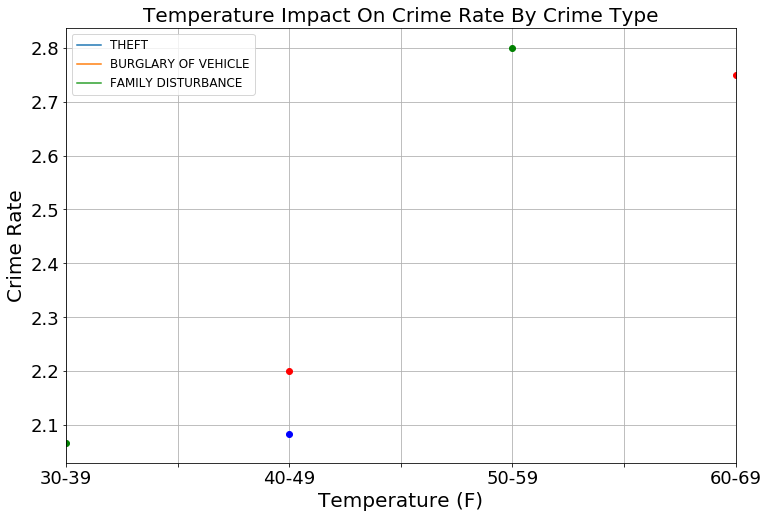

In [50]:
ax = df_pivot1.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot1.plot(figsize=(12,8), style=["ro:", "bo:", "go:"], markersize=6, ax = ax, grid=True)
plt.title("Temperature Impact On Crime Rate By Crime Type", fontsize=20)
plt.legend(legend, fontsize=12)
plt.xlabel("Temperature (F)", fontsize=20)
plt.ylabel("Crime Rate", fontsize=20)
plt.tick_params(labelsize=18)

#### Crime Rate vs. Precipitation Intensity by Location Type

In [53]:
df_2 = df_result[["Precipitation Intensity", "Location Type", "Date"]]
df_2

,Precipitation Intensity,Location Type,Date
0,0.0,RESIDENCE / HOME,1546322400
1,0.0,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),1546322400
2,0.0,SPECIALTY STORE (TV FUR ETC.),1546322400
3,0.0,STREETS / HWY / ROAD / ALLEY,1546322400
4,0.0,STREETS / HWY / ROAD / ALLEY,1546322400
...,...,...,...
995,0.0,GROCERY / SUPERMARKET,1546646400
996,0.0,BAR / NIGHT CLUB,1546646400
997,0.0,STREETS / HWY / ROAD / ALLEY,1546646400
998,0.0,STREETS / HWY / ROAD / ALLEY,1546646400


In [54]:
df_group2 = df_2.groupby(["Location Type", "Precipitation Intensity"])["Date"]
crime_counts = df_group2.count()
hour_counts = df_group2.nunique()
crime_rates = crime_counts / hour_counts
top5 = crime_rates.sort_values(ascending=False).head(30)
df_crime_rates2 = top5.to_frame()
df_crime_rates2 = df_crime_rates2.reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates2

,Location Type,Precipitation Intensity,Crime Rate
0,RESIDENCE / HOME,0.0245,8.000000
1,RESIDENCE / HOME,0.0006,8.000000
2,RESIDENCE / HOME,0.0201,8.000000
3,RESIDENCE / HOME,0.0630,7.000000
4,RESIDENCE / HOME,0.0090,6.000000
5,RESIDENCE / HOME,0.0076,6.000000
6,RESIDENCE / HOME,0.1832,6.000000
7,RESIDENCE / HOME,0.1964,6.000000
8,RESIDENCE / HOME,0.0000,5.081967
9,RESIDENCE / HOME,0.0159,5.000000


In [55]:
legend2 = df_crime_rates2["Location Type"].drop_duplicates()
# legend

In [57]:
# Pivoting results dataframe
df_pivot2 = pd.pivot_table(df_crime_rates2, values=["Crime Rate"], index =["Precipitation Intensity"],
                   columns=["Location Type"])

df_pivot2

Crime Rate  \
Location Type           COMMERCIAL / OFFICE BUILDING   
Precipitation Intensity                                
0.0000                                           NaN   
0.0004                                           NaN   
0.0006                                           NaN   
0.0008                                           NaN   
0.0023                                           NaN   
0.0029                                           NaN   
0.0064                                           NaN   
0.0075                                           NaN   
0.0076                                           NaN   
0.0090                                           2.0   
0.0094                                           NaN   
0.0142                                           NaN   
0.0159                                           NaN   
0.0163                                           NaN   
0.0183                                           NaN   
0.0201                                           NaN   
0.0245                                           NaN   
0.0500                                           NaN   
0.0630                                           NaN   
0.1832                                           NaN   
0.1964                                           3.0   

                                                                          \
Location Type           DEPARTMENT / DISCOUNT STORE HOTEL / MOTEL / ETC.   
Precipitation Intensity                                                    
0.0000                                          NaN                  NaN   
0.0004                                          NaN                  NaN   
0.0006                                          NaN                  NaN   
0.0008                                          NaN                  NaN   
0.0023                                          NaN                  NaN   
0.0029                                          NaN                  NaN   
0.0064                                          NaN                  NaN   
0.0075                                          NaN                  NaN   
0.0076                                          NaN                  2.0   
0.0090                                          NaN                  NaN   
0.0094                                          NaN                  NaN   
0.0142                                          NaN                  NaN   
0.0159                                          NaN                  NaN   
0.0163                                          NaN                  NaN   
0.0183                                          NaN                  NaN   
0.0201                                          NaN                  NaN   
0.0245                                          NaN                  NaN   
0.0500                                          3.0                  NaN   
0.0630                                          NaN                  NaN   
0.1832                                          NaN                  NaN   
0.1964                                          NaN                  NaN   

                                                               \
Location Type           OTHER / UNKNOWN PARKING LOTS / GARAGE   
Precipitation Intensity                                         
0.0000                              NaN                   NaN   
0.0004                              NaN                   NaN   
0.0006                              2.0                   NaN   
0.0008                              NaN                   NaN   
0.0023                              NaN                   NaN   
0.0029                              NaN                   NaN   
0.0064                              NaN                   NaN   
0.0075                              NaN                   NaN   
0.0076                              NaN                   NaN   
0.0090                              NaN                   NaN   
0.0094                     

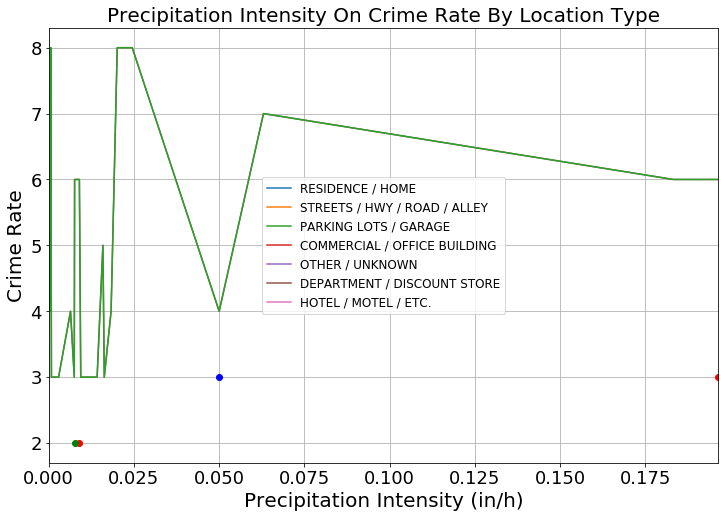

In [59]:
ax = df_pivot2.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot2.plot(figsize=(12,8), style=["ro:", "bo:", "go:"], markersize=6, ax = ax, grid=True)
plt.title("Precipitation Intensity On Crime Rate By Location Type", fontsize=20)
plt.legend(legend2, fontsize=12)
plt.xlabel("Precipitation Intensity (in/h)", fontsize=20)
plt.ylabel("Crime Rate", fontsize=20)
plt.tick_params(labelsize=18)

#### Crime Rate vs. Moon Phase by Crime Type

In [61]:
df_3 = df_result[["Moon Phase", "Crime Type", "Date"]]
df_3

,Moon Phase,Crime Type,Date
0,last Quarter Moon,FAMILY DISTURBANCE,1546322400
1,last Quarter Moon,DISTURBANCE - OTHER,1546322400
2,last Quarter Moon,BURGLARY NON RESIDENCE,1546322400
3,last Quarter Moon,CRASH/FAIL STOP AND RENDER AID,1546322400
4,last Quarter Moon,DWI,1546322400
...,...,...,...
995,last Quarter Moon,THEFT BY SHOPLIFTING,1546646400
996,last Quarter Moon,DEBIT CARD ABUSE,1546646400
997,last Quarter Moon,THEFT FROM PERSON,1546646400
998,last Quarter Moon,THEFT,1546646400


In [62]:
df_group3 = df_3.groupby(["Crime Type", "Moon Phase"])["Date"]
crime_counts = df_group3.count()
hour_counts = df_group3.nunique()
crime_rates3 = crime_counts / hour_counts
top5 = crime_rates3.sort_values(ascending=False).head(5)
df_crime_rates3 = top5.to_frame()
df_crime_rates3 = df_crime_rates3.reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates3

,Crime Type,Moon Phase,Crime Rate
0,BURGLARY OF VEHICLE,last Quarter Moon,2.146341
1,THEFT,last Quarter Moon,2.023810
2,FAMILY DISTURBANCE,last Quarter Moon,1.867925
3,DOC DISCHARGE GUN - PUB PLACE,last Quarter Moon,1.500000
4,PROTECTIVE ORDER,last Quarter Moon,1.500000


In [63]:
legend3 = df_crime_rates3["Crime Type"]
df_pivot3 = pd.pivot_table(df_crime_rates3, values=["Crime Rate"], index =["Moon Phase"],
                   columns=["Crime Type"])

df_pivot3

Crime Rate                                \
Crime Type        BURGLARY OF VEHICLE DOC DISCHARGE GUN - PUB PLACE   
Moon Phase                                                            
last Quarter Moon            2.146341                           1.5   

                                                                
Crime Type        FAMILY DISTURBANCE PROTECTIVE ORDER    THEFT  
Moon Phase                                                      
last Quarter Moon           1.867925              1.5  2.02381

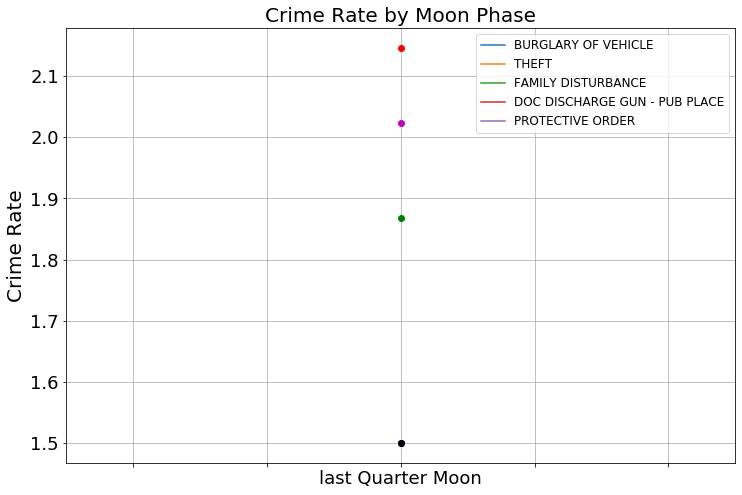

In [64]:
ax = df_pivot3.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot3.plot(figsize=(12,8), style=["ro", "bo", "go", "ko", "mo"], markersize=6, ax = ax, grid=True)
plt.title("Crime Rate by Moon Phase", fontsize=20)
plt.legend(legend3, fontsize=12)
plt.xlabel("")
plt.ylabel("Crime Rate", fontsize=20)
plt.tick_params(labelsize=18)

## Written Analysis and Conclusions